In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import datetime as dt


In [3]:
hotspot_df = pd.read_excel("hotspotcleaned.xlsx")



In [4]:
hotspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141527 entries, 0 to 141526
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FID           141527 non-null  int64  
 1   FID_fire_a    141527 non-null  int64  
 2   LATITUDE      141527 non-null  float64
 3   LONGITUDE     141527 non-null  float64
 4   BRIGHTNESS    141527 non-null  float64
 5   SCAN          141527 non-null  float64
 6   TRACK         141527 non-null  float64
 7   ACQ_DATE      141527 non-null  object 
 8   ACQ_TIME      141527 non-null  int64  
 9   SATELLITE     141527 non-null  object 
 10  INSTRUMENT    141527 non-null  object 
 11  CONFIDENCE    141527 non-null  object 
 12  VERSION       141527 non-null  int64  
 13  BRIGHT_T31    141527 non-null  float64
 14  FRP           141527 non-null  float64
 15  DAYNIGHT      141527 non-null  object 
 16  TYPE          141527 non-null  int64  
 17  เวลา_ไทย      141527 non-null  int64  
 18  ตำบล

In [5]:
hotspot_df.columns

Index(['FID', 'FID_fire_a', 'LATITUDE', 'LONGITUDE', 'BRIGHTNESS', 'SCAN',
       'TRACK', 'ACQ_DATE', 'ACQ_TIME', 'SATELLITE', 'INSTRUMENT',
       'CONFIDENCE', 'VERSION', 'BRIGHT_T31', 'FRP', 'DAYNIGHT', 'TYPE',
       'เวลา_ไทย', 'ตำบล', 'อำเภอ', 'จังหวัด', 'ภูมิภาค', 'วันที่_ไทย.1',
       'ค่าpm'],
      dtype='object')

# Hotspot Data

In [6]:
hotspot_df.drop(['FID', 'LATITUDE', 'LONGITUDE', 'FID_fire_a','SCAN',
       'TRACK', 'VERSION', 'SATELLITE', 'INSTRUMENT', "ACQ_TIME", 'เวลา_ไทย', 'ตำบล', 'อำเภอ', 'ภูมิภาค', 'วันที่_ไทย.1'], axis=1, inplace=True)

In [7]:
def replace_date(x):

    if type(x) == str:
        
        try:
            return dt.datetime.strptime(x, "%Y-%d-%m %H:%M:%S")

        except ValueError:

            
            return dt.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")

    else:
        return dt.datetime.strftime(x, "%Y-%m-%d %H:%M:%S")

In [8]:
hotspot_df["ACQ_DATE"] = hotspot_df["ACQ_DATE"].astype(str)

In [9]:
def thai_to_universal(date):

    if date == '29/2/2563 0:00:00':

        day = date[:2]
        month = str(0) + date[3]
        year = str(2563 - 543)
        time = date[10:]   
    
        return year + "-" + month + "-" + day + " " + time
    
    else:
        current_year = date[:4]

        replace_year = int(current_year) - 543

        return date.replace(current_year, str(replace_year))

In [10]:
hotspot_df["ACQ_DATE"] = hotspot_df["ACQ_DATE"].apply(thai_to_universal)

In [11]:
hotspot_df["ACQ_DATE"] = hotspot_df["ACQ_DATE"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [12]:
hotspot_df["ACQ_DATE"].sort_values()

14726    2019-11-01
110968   2019-11-01
139497   2019-11-01
109391   2019-11-02
140868   2019-11-02
            ...    
2886     2020-05-31
86739    2020-05-31
66366    2020-05-31
88163    2020-05-31
141526   2020-05-31
Name: ACQ_DATE, Length: 141527, dtype: datetime64[ns]

In [13]:
hotspot_df.sort_values(by=["ACQ_DATE"])

,BRIGHTNESS,ACQ_DATE,CONFIDENCE,BRIGHT_T31,FRP,DAYNIGHT,TYPE,จังหวัด,ค่าpm
14726,328.29,2019-11-01,n,291.93,2.49,D,0,เชียงใหม่,17
110968,303.32,2019-11-01,n,287.26,0.96,N,0,ชลบุรี,26
139497,305.05,2019-11-01,n,288.91,1.68,N,2,ชลบุรี,26
109391,307.49,2019-11-02,n,287.92,0.78,N,0,ระยอง,20
140868,314.89,2019-11-02,n,288.13,1.59,N,2,สระบุรี,36
...,...,...,...,...,...,...,...,...,...
2886,328.06,2020-05-31,n,295.32,3.85,D,0,เชียงใหม่,15
86739,307.13,2020-05-31,n,292.67,0.57,N,0,ตาก,10
66366,331.21,2020-05-31,n,290.19,2.41,D,0,ลำพูน,8
88163,305.77,2020-05-31,n,292.09,0.60,N,0,ตาก,10


In [14]:
columns_rename ={"จังหวัด":"CITY", "ค่าpm": "PM2.5"}

In [15]:
hotspot_df.rename(columns_rename, axis=1, inplace=True)

In [16]:
hotspot_df.sort_values(by=["ACQ_DATE"], inplace=True)
hotspot_df.reset_index(inplace=True)
hotspot_df.drop(["index"], axis=1, inplace=True)

# PM 2.5 data

In [17]:
pm_df = pd.read_csv("pm2.5cleaned.csv")

In [18]:
columns_rename = {"ปี":"year","เดือน": "month","วัน": "day","country.2" :"CITY", "ค่า":"PM2.5"}

In [19]:
pm_df.rename(columns_rename, axis=1, inplace=True)

In [20]:
pm_df[["year", "month", "day"]]

,year,month,day
0,2019,มกราคม,1
1,2019,มกราคม,2
2,2019,มกราคม,3
3,2019,มกราคม,4
4,2019,มกราคม,5
...,...,...,...
24516,2020,ธันวาคม,27
24517,2020,ธันวาคม,28
24518,2020,ธันวาคม,29
24519,2020,ธันวาคม,30


In [21]:
month_dict = {
    "มกราคม": "01",
    "กุมภาพันธ์": "02",
    "มีนาคม": "03", 
    "เมษายน": "04", 
    "พฤษภาคม": "05",
    "มิถุนายน": "06",
    "กรกฎาคม": "07",
    "สิงหาคม": "08",
    "กันยายน": "09",
    "ตุลาคม": "10",
    "พฤศจิกายน": "11",
    "ธันวาคม": "12"}

In [22]:
pm_df["hour"] = "0"

In [23]:
pm_df["minute"] = "0"

In [24]:
pm_df["second"] = "0"

In [25]:
pm_df["month"] = pm_df["month"].replace(month_dict)

In [26]:
pm_df["ACQ_DATE"] = pd.to_datetime(pm_df[["year", "month", "day", "hour", "minute", "second"]], format='%Y-%m-%d %H:%M:%S')

In [27]:
pm_df.drop(["hour","minute","second","month","day", "year"], axis=1, inplace=True)

In [28]:
pm_df

,CITY,PM2.5,ACQ_DATE
0,กรุงเทพมหานคร,15,2019-01-01
1,กรุงเทพมหานคร,21,2019-01-02
2,กรุงเทพมหานคร,24,2019-01-03
3,กรุงเทพมหานคร,27,2019-01-04
4,กรุงเทพมหานคร,33,2019-01-05
...,...,...,...
24516,อุบลราชธานี,15,2020-12-27
24517,อุบลราชธานี,19,2020-12-28
24518,อุบลราชธานี,21,2020-12-29
24519,อุบลราชธานี,15,2020-12-30


In [29]:
hotspot_df

,BRIGHTNESS,ACQ_DATE,CONFIDENCE,BRIGHT_T31,FRP,DAYNIGHT,TYPE,CITY,PM2.5
0,328.29,2019-11-01,n,291.93,2.49,D,0,เชียงใหม่,17
1,303.32,2019-11-01,n,287.26,0.96,N,0,ชลบุรี,26
2,305.05,2019-11-01,n,288.91,1.68,N,2,ชลบุรี,26
3,307.49,2019-11-02,n,287.92,0.78,N,0,ระยอง,20
4,314.89,2019-11-02,n,288.13,1.59,N,2,สระบุรี,36
...,...,...,...,...,...,...,...,...,...
141522,328.06,2020-05-31,n,295.32,3.85,D,0,เชียงใหม่,15
141523,307.13,2020-05-31,n,292.67,0.57,N,0,ตาก,10
141524,331.21,2020-05-31,n,290.19,2.41,D,0,ลำพูน,8
141525,305.77,2020-05-31,n,292.09,0.60,N,0,ตาก,10


In [30]:
left_merge = pm_df.merge(hotspot_df, how="left", on=["ACQ_DATE", "CITY"])

In [31]:
#left_merge.drop(["ACQ_DATE_y"], axis=1, inplace=True)

In [32]:
left_merge

,CITY,PM2.5_x,ACQ_DATE,BRIGHTNESS,CONFIDENCE,BRIGHT_T31,FRP,DAYNIGHT,TYPE,PM2.5_y
0,กรุงเทพมหานคร,15,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,กรุงเทพมหานคร,21,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,กรุงเทพมหานคร,24,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,กรุงเทพมหานคร,27,2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,กรุงเทพมหานคร,33,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
161401,อุบลราชธานี,15,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161402,อุบลราชธานี,19,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161403,อุบลราชธานี,21,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161404,อุบลราชธานี,15,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
left_merge.CITY.unique()

array(['กรุงเทพมหานคร', 'กาญจนบุรี', 'ขอนแก่น', 'ฉะเชิงเทรา', 'ชลบุรี',
       'เชียงราย', 'เชียงใหม่', 'ตาก', 'นครปฐม', 'นครราชสีมา',
       'นครสวรรค์', 'นนทบุรี', 'นราธิวาส', 'น่าน', 'ปทุมธานี',
       'ปราจีนบุรี', 'พระนครศรีอยุธยา', 'พะเยา', 'แพร่', 'ภูเก็ต',
       'แม่ฮ่องสอน', 'ยะลา', 'ระยอง', 'ราชบุรี', 'ลำปาง', 'ลำพูน', 'เลย',
       'สงขลา', 'สตูล', 'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร',
       'สระแก้ว', 'สระบุรี', 'สุราษฏร์ธานี', 'หนองคาย', 'อุบลราชธานี'],
      dtype=object)

In [34]:
left_merge.to_excel("merged_left.xlsx", index=False)

# EDA

In [35]:
left_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161406 entries, 0 to 161405
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CITY        161406 non-null  object        
 1   PM2.5_x     161406 non-null  int64         
 2   ACQ_DATE    161406 non-null  datetime64[ns]
 3   BRIGHTNESS  141377 non-null  float64       
 4   CONFIDENCE  141377 non-null  object        
 5   BRIGHT_T31  141377 non-null  float64       
 6   FRP         141377 non-null  float64       
 7   DAYNIGHT    141377 non-null  object        
 8   TYPE        141377 non-null  float64       
 9   PM2.5_y     141377 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 13.5+ MB


In [36]:
bangkok = left_merge[left_merge["CITY"] == "กรุงเทพมหานคร"]

In [37]:
bangkok["ACQ_DATE"].count(), bangkok["ACQ_DATE"].nunique()

(860, 731)

In [38]:
bangkok["ACQ_DATE"].value_counts()

2020-02-19    8
2020-05-16    7
2020-04-21    7
2020-04-05    7
2020-03-27    6
             ..
2019-09-03    1
2019-09-04    1
2019-09-05    1
2019-09-06    1
2020-12-31    1
Name: ACQ_DATE, Length: 731, dtype: int64

<AxesSubplot:xlabel='ACQ_DATE', ylabel='count'>

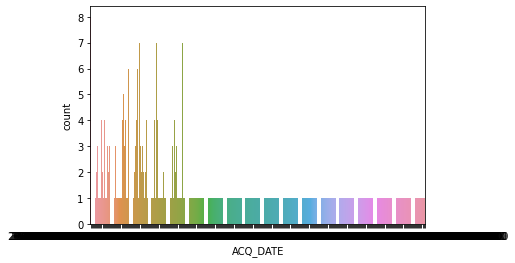

In [39]:
sns.countplot(x="ACQ_DATE", data=bangkok[bangkok["ACQ_DATE"] > "2020-02-18"])

In [40]:
bangkok[bangkok["ACQ_DATE"] == "2020-02-19"]

,CITY,PM2.5_x,ACQ_DATE,BRIGHTNESS,CONFIDENCE,BRIGHT_T31,FRP,DAYNIGHT,TYPE,PM2.5_y
434,กรุงเทพมหานคร,52,2020-02-19,332.24,l,303.87,1.82,D,0.0,52.0
435,กรุงเทพมหานคร,52,2020-02-19,333.15,l,305.05,0.85,D,0.0,52.0
436,กรุงเทพมหานคร,52,2020-02-19,331.78,n,303.42,4.02,D,0.0,52.0
437,กรุงเทพมหานคร,52,2020-02-19,346.39,n,305.57,4.02,D,0.0,52.0
438,กรุงเทพมหานคร,52,2020-02-19,355.89,n,304.86,6.94,D,0.0,52.0
439,กรุงเทพมหานคร,52,2020-02-19,335.56,n,303.14,5.36,D,0.0,52.0
440,กรุงเทพมหานคร,52,2020-02-19,334.92,n,300.81,4.14,D,0.0,52.0
441,กรุงเทพมหานคร,52,2020-02-19,343.81,n,303.06,3.86,D,0.0,52.0


In [41]:
pm_df

,CITY,PM2.5,ACQ_DATE
0,กรุงเทพมหานคร,15,2019-01-01
1,กรุงเทพมหานคร,21,2019-01-02
2,กรุงเทพมหานคร,24,2019-01-03
3,กรุงเทพมหานคร,27,2019-01-04
4,กรุงเทพมหานคร,33,2019-01-05
...,...,...,...
24516,อุบลราชธานี,15,2020-12-27
24517,อุบลราชธานี,19,2020-12-28
24518,อุบลราชธานี,21,2020-12-29
24519,อุบลราชธานี,15,2020-12-30


In [42]:
bangkok = pm_df[pm_df["CITY"] == "กรุงเทพมหานคร"]

In [43]:
bangkok

,CITY,PM2.5,ACQ_DATE
0,กรุงเทพมหานคร,15,2019-01-01
1,กรุงเทพมหานคร,21,2019-01-02
2,กรุงเทพมหานคร,24,2019-01-03
3,กรุงเทพมหานคร,27,2019-01-04
4,กรุงเทพมหานคร,33,2019-01-05
...,...,...,...
726,กรุงเทพมหานคร,41,2020-12-27
727,กรุงเทพมหานคร,27,2020-12-28
728,กรุงเทพมหานคร,36,2020-12-29
729,กรุงเทพมหานคร,36,2020-12-30


In [44]:
cities = list(left_merge["CITY"].unique())

for city in cities:

    df = left_merge[left_merge["CITY"] == city]

    
    print(city, len(df), sep=" : ")




กรุงเทพมหานคร : 860
กาญจนบุรี : 15748
ขอนแก่น : 4434
ฉะเชิงเทรา : 1314
ชลบุรี : 1590
เชียงราย : 8638
เชียงใหม่ : 22282
ตาก : 16502
นครปฐม : 769
นครราชสีมา : 4813
นครสวรรค์ : 7347
นนทบุรี : 756
นราธิวาส : 686
น่าน : 7909
ปทุมธานี : 1122
ปราจีนบุรี : 2483
พระนครศรีอยุธยา : 1537
พะเยา : 4724
แพร่ : 5958
ภูเก็ต : 553
แม่ฮ่องสอน : 16899
ยะลา : 726
ระยอง : 1031
ราชบุรี : 2642
ลำปาง : 9785
ลำพูน : 3830
เลย : 5494
สงขลา : 678
สตูล : 734
สมุทรปราการ : 789
สมุทรสงคราม : 303
สมุทรสาคร : 738
สระแก้ว : 1874
สระบุรี : 3247
สุราษฏร์ธานี : 723
หนองคาย : 544
อุบลราชธานี : 1344


In [45]:
pm_df.to_csv("pm2.5_date_newest.csv")